In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 14



In [35]:
data = pd.read_csv('datasets/Buses/buses_500000.csv', 
                   names=['busID','ProximaParada','Ruta','Orientacion','rangoHora','tiempoRecorrido'])

In [36]:
data.head()

busID ProximaParada        Ruta  Orientacion  rangoHora  tiempoRecorrido
0   3433    MTABC_BXM8  MTA_450451          1.0        2.0            856.0
1   3433    MTABC_BXM8  MTA_450451          1.0        5.0            636.0
2   3984  MTA NYCT_Q54  MTA_505205          1.0        5.0             96.0
3   3984  MTA NYCT_Q54  MTA_505205          1.0        7.5             32.0
4   5517     MTABC_Q10  MTA_550335          0.0       11.5             31.0

In [38]:
data.dropna(inplace=True)

In [39]:
from __future__ import division

print 'Size without nan: ', len(data.Ruta.dropna())
print 'Size Total: ', len(data.Ruta)
print 'Percentage: ', (len(data.Ruta.dropna())/len(data.Ruta))*100

# freq = data["Ruta"].value_counts().sort_values(ascending=False)
# freq.plot(kind='bar', title='Ruta', figsize=(12.,6.))
# plt.ylabel('Frequency')
# plt.show()
# plt.close()

Size without nan:  497091
Size Total:  497091
Percentage:  100.0


In [40]:
from collections import defaultdict
encodersDict = defaultdict(LabelEncoder)

def categoricalColumns(df):
    df = df.copy()
    cols = df.columns
    cols_numeric = df._get_numeric_data().columns
    return list(set(cols) - set(cols_numeric))

def categoricalToNumeric(df):
    df = df.copy()
    cat_columns = categoricalColumns(df)
    print('Categorical columns: ', cat_columns)
    print('Size columns: ', len(cat_columns))
    if cat_columns:
        for category in cat_columns:
#             encoder = LabelEncoder()
#             df.loc[:, category] = encoder.fit_transform(df[category])
            x = df[category]
            df.loc[:, category] = encodersDict[x.name].fit_transform(x)

    return df

In [41]:
dataNew = categoricalToNumeric(data)

('Categorical columns: ', ['Ruta', 'ProximaParada'])
('Size columns: ', 2)


In [42]:
dataNew.head()

busID  ProximaParada   Ruta  Orientacion  rangoHora  tiempoRecorrido
0   3433            249   9669          1.0        2.0            856.0
1   3433            249   9669          1.0        5.0            636.0
2   3984            160  12157          1.0        5.0             96.0
3   3984            160  12157          1.0        7.5             32.0
4   5517            255  12440          0.0       11.5             31.0

In [43]:
dataNew.to_csv("datasets/Buses/buses_500000_filtered.csv", index=False)

In [8]:
from sklearn.model_selection import cross_val_score

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Ruta'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#     Perform cross-validation:
#     print('Testing')
#     if performCV:
#         cv_score = cross_val_score(alg, dtrain[predictors], dtrain['accident_type'], cv=cv_folds, scoring='roc_auc')
#     print('Testing')    
#     #Print model report:
#     print "\nModel Report"
#     print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['accident_type'].values, dtrain_predictions)
#     print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['accident_type'], dtrain_predprob)
    
#     if performCV:
#         print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances', figsize=(14.,7.))
        plt.ylabel('Feature Importance Score')
        plt.show()
        plt.close()
    
    return feat_imp


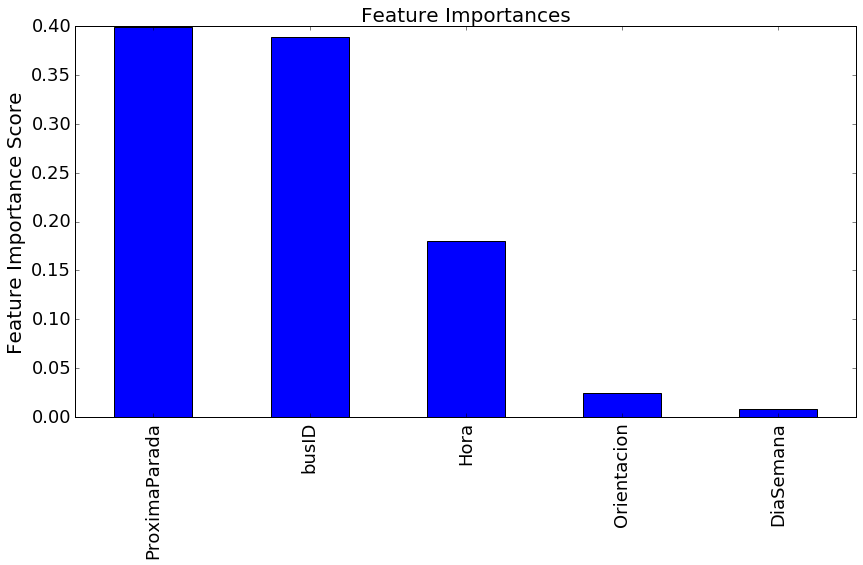

ProximaParada    0.398945
busID            0.388717
Hora             0.179905
Orientacion      0.024204
DiaSemana        0.008230
dtype: float64
CPU times: user 1.08 s, sys: 428 ms, total: 1.51 s
Wall time: 1.07 s


In [9]:
%%time
target = 'Ruta'
#IDcol = 'mineid'

predictors = [x for x in dataNew if x not in [target]]
model = ExtraTreesClassifier(random_state=10)
fi = modelfit(model, dataNew, predictors)
print fi.head(6)


In [12]:
from collections import OrderedDict

dictFI = OrderedDict(fi)

In [13]:
scatter = dictFI.keys()
scatter.append('Ruta')
# scatter

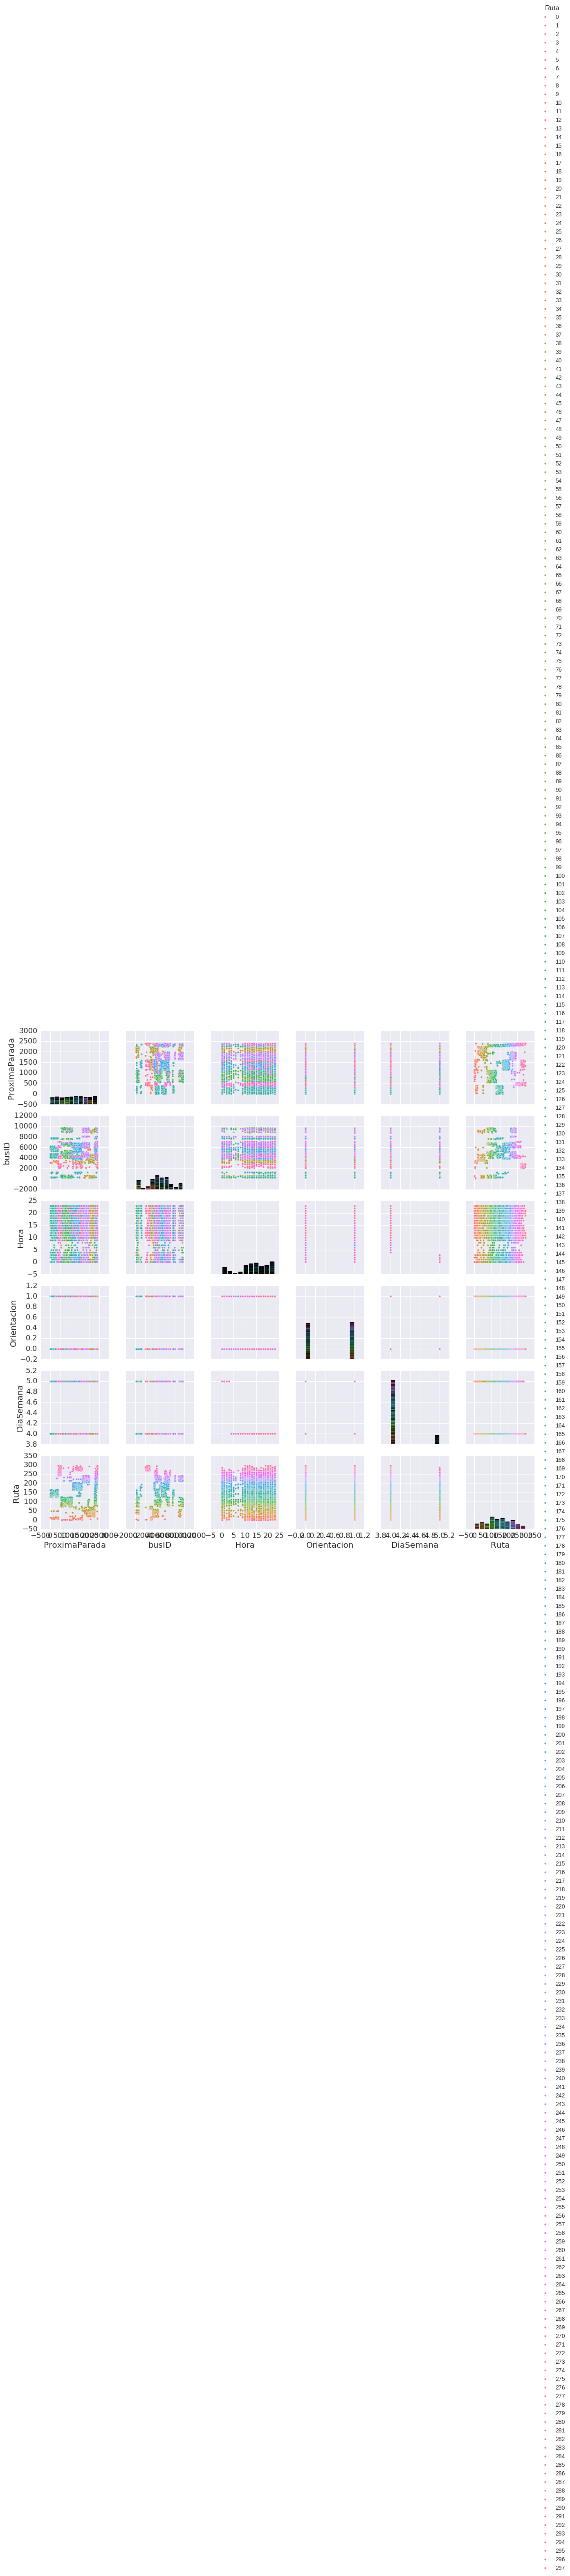

CPU times: user 4min 8s, sys: 1min 22s, total: 5min 31s
Wall time: 3min 11s


In [17]:
%%time
sns.pairplot(dataNew[scatter], hue="Ruta", size=3)
plt.show()